In [29]:
!pip install rasterio
!pip install earthpy

     |████████████████████████████████| 1.4MB 6.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 43.3MB/s 
     |████████████████████████████████| 14.8MB 263kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=24b6899bed0bc25b548fe7609ac52a4c680143bb9b78199557906a01efdb4e8d
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [13]:
%ls

'Colab Notebooks'/   data/   Dataset/  'Getting started.pdf'   LST.h5


In [19]:
import rioxarray
surface_HARV = rioxarray.open_rasterio("/content/drive/My Drive/data/MOD11A1.006_Clear_day_cov_doy2018309_aid0001.tiff")
surface_HARV

<xarray.DataArray (band: 1, y: 528, x: 1205)>
[636240 values with dtype=int32]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 4.591e+06 4.59e+06 ... 4.104e+06 4.103e+06
  * x            (x) float64 -1.104e+07 -1.103e+07 ... -9.921e+06 -9.92e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [20]:
print(surface_HARV.rio.crs)
print(surface_HARV.rio.nodata)
print(surface_HARV.rio.bounds())
print(surface_HARV.rio.width)
print(surface_HARV.rio.height)

PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
0
(-11036108.90769167, 4102170.7921369453, -9919525.260859726, 4591429.020790279)
1205
528


In [21]:
surface_HARV.values

array([[[   0,    0,    0, ..., 2000, 2000, 2000],
        [   0,    0,    0, ..., 2000, 2000, 2000],
        [   0,    0,    0, ..., 2000, 2000,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=int32)

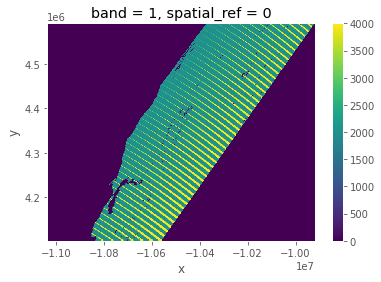

In [23]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
surface_HARV.plot()

In [31]:
#import earthpy
#print(earthpy.epsg[surface_HARV.rio.crs])


In [32]:
print(surface_HARV.min())
print(surface_HARV.max())

<xarray.DataArray ()>
array(0, dtype=int32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(4000, dtype=int32)
Coordinates:
    spatial_ref  int64 0


In [33]:
import numpy
print(numpy.percentile(surface_HARV, 25))
print(numpy.percentile(surface_HARV, 75))


0.0
2000.0


In [41]:
surface_terrain_HARV_UTM18 = rioxarray.open_rasterio("/content/drive/My Drive/data/MOD13A1.006__500m_16_days_NDVI_doy2018305_aid0001.tif")
surface_terrain_HARV_UTM18

<xarray.DataArray (band: 1, y: 1055, x: 1291)>
[1362005 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 41.29 41.28 41.28 41.27 ... 36.91 36.9 36.9 36.89
  * x            (x) float64 -124.1 -124.1 -124.1 ... -118.7 -118.7 -118.7
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3000.0
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

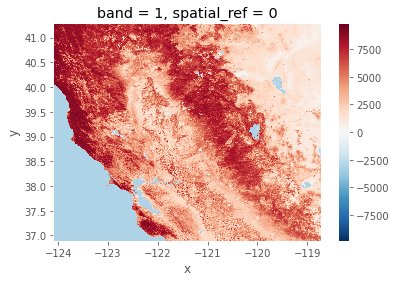

In [42]:
plt.style.use("ggplot")
surface_terrain_HARV_UTM18.plot()

In [44]:
terrain_HARV_matched = surface_terrain_HARV_UTM18.rio.reproject_match(surface_HARV)

In [54]:
canopy_HARV = surface_HARV + terrain_HARV_matched
canopy_HARV.compute()

<xarray.DataArray (band: 1, y: 504, x: 762)>
array([[[-3000, -3000, -3000, ...,  2958,  3054,  2525],
        [-3000, -3000, -3000, ...,  3034,  2937, -1000],
        [-3000, -3000, -3000, ...,  2847,  2626, -3000],
        ...,
        [-3000, -3000, -3000, ..., -3000, -3000, -3000],
        [-3000, -3000, -3000, ..., -3000, -3000, -3000],
        [-3000, -3000, -3000, ..., -3000, -3000, -3000]]], dtype=int32)
Coordinates:
  * y            (y) float64 4.591e+06 4.59e+06 ... 4.104e+06 4.103e+06
  * x            (x) float64 -1.104e+07 -1.103e+07 ... -9.93e+06 -9.92e+06
  * band         (band) int64 1
    spatial_ref  int64 0

In [57]:
print(canopy_HARV.min())
print(canopy_HARV.max())

<xarray.DataArray ()>
array(-3000, dtype=int32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(13395, dtype=int32)
Coordinates:
    spatial_ref  int64 0


In [58]:
print(numpy.percentile(surface_HARV, 25))
print(numpy.percentile(surface_HARV, 75))

0.0
2000.0


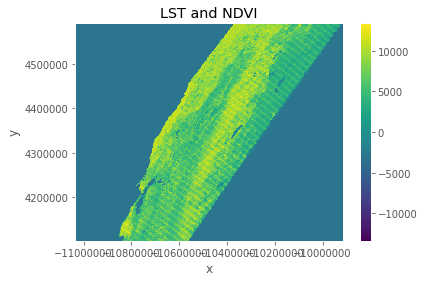

In [55]:
canopy_HARV.plot(cmap="viridis")
plt.style.use("ggplot")
plt.title("LST and NDVI")
plt.ticklabel_format(style="plain") 

(array([251875.,   1969.,    954.,   7559.,  27430.,  30359.,  25448.,
         24615.,  13043.,    796.]),
 array([-3000. , -1360.5,   279. ,  1918.5,  3558. ,  5197.5,  6837. ,
         8476.5, 10116. , 11755.5, 13395. ]),
 <a list of 10 Patch objects>)

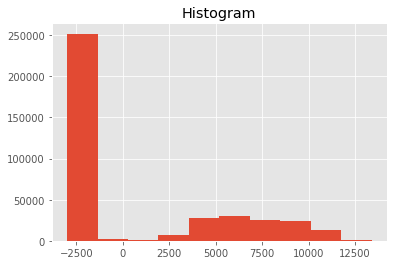

In [56]:
plt.figure()
plt.style.use('ggplot')
canopy_HARV.plot.hist()

(array([2.51789e+05, 2.90000e+01, 2.10000e+01, 1.60000e+01, 2.00000e+01,
        9.00000e+01, 1.53700e+03, 8.80000e+01, 1.23000e+02, 1.31000e+02,
        1.04000e+02, 1.60000e+02, 4.76000e+02, 1.08000e+02, 1.06000e+02,
        1.54000e+02, 5.43000e+02, 1.18800e+03, 2.47900e+03, 3.19500e+03,
        4.07800e+03, 5.13200e+03, 5.93600e+03, 6.01400e+03, 6.27000e+03,
        6.24700e+03, 6.20000e+03, 6.11900e+03, 6.03700e+03, 5.75600e+03,
        5.51300e+03, 5.19300e+03, 4.96600e+03, 4.91300e+03, 4.86300e+03,
        5.02500e+03, 5.12700e+03, 4.98500e+03, 4.84900e+03, 4.62900e+03,
        4.19800e+03, 4.01600e+03, 3.14200e+03, 1.09500e+03, 5.92000e+02,
        4.25000e+02, 2.30000e+02, 9.60000e+01, 3.70000e+01, 8.00000e+00]),
 array([-3000. , -2672.1, -2344.2, -2016.3, -1688.4, -1360.5, -1032.6,
         -704.7,  -376.8,   -48.9,   279. ,   606.9,   934.8,  1262.7,
         1590.6,  1918.5,  2246.4,  2574.3,  2902.2,  3230.1,  3558. ,
         3885.9,  4213.8,  4541.7,  4869.6,  5197.5,  5

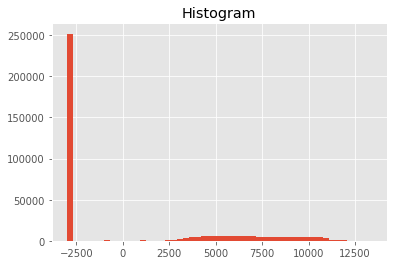

In [59]:
canopy_HARV.plot.hist(bins=50)